In [17]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Sklearn:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
# Other:
from scipy.stats import shapiro
from scipy.stats import iqr

# Data:
pd.set_option('display.max_columns', None)
df_co2 = pd.read_excel('Mobiliteitsdata.xlsx')
print("Head of the data")
display(df_co2.head())
print("Column list")
display(df_co2.columns.tolist())
pd.set_option('display.max_columns', 10)

Head of the data


,persoon_ID,geslacht,leeftijd,gewicht_KG,burgerlijke_staat,jaarsalaris_eu,huishouden_grootte,stad,provincie,opleiding_niveau,autobezit,fietsbezit,elektrisch_auto,km_auto_per_jaar,km_fiets_per_jaar,km_ov_per_jaar,km_vliegtuig_per_jaar,dagen_thuiswerken_per_week_pro_rato,dagen_kantoorwerken_per_week_pro_rato,dagen_in_buitenland_per_jaar,gebruik_carsharing,co2_uitstoot_per_jaar_KG
0,811069,man,50,52.66,weduwe/weduwnaar,48003.64,5,Almere,Flevoland,MBO,ja,ja,nee,13266.05,2040.54,3227.95,480.71,4,1,20,Nooit,7591.93
1,246882,vrouw,65,64.58,samenwonend,55208.63,2,Leeuwarden,Overijssel,WO,ja,nee,nee,15229.89,0.00,2298.96,1423.34,5,0,7,Heel soms,8742.25
2,978385,man,49,90.87,samenwonend,29533.78,2,Tilburg,Utrecht,HBO,ja,ja,ja,19853.24,1540.46,4504.21,632.48,4,1,2,Altijd,4513.56
3,120468,man,34,80.43,gehuwd,44453.27,2,Maastricht,Utrecht,HBO,ja,ja,nee,9935.50,1825.92,4407.56,1266.84,3,2,21,Heel soms,6904.41
4,637034,man,60,72.28,ongehuwd,56497.64,2,Leiden,Gelderland,MBO,ja,ja,ja,16266.67,1851.07,1936.12,1676.00,0,5,0,Nooit,4420.80


Column list


['persoon_ID',
 'geslacht',
 'leeftijd',
 'gewicht_KG',
 'burgerlijke_staat',
 'jaarsalaris_eu',
 'huishouden_grootte',
 'stad',
 'provincie',
 'opleiding_niveau',
 'autobezit',
 'fietsbezit',
 'elektrisch_auto',
 'km_auto_per_jaar',
 'km_fiets_per_jaar',
 'km_ov_per_jaar',
 'km_vliegtuig_per_jaar',
 'dagen_thuiswerken_per_week_pro_rato',
 'dagen_kantoorwerken_per_week_pro_rato',
 'dagen_in_buitenland_per_jaar',
 'gebruik_carsharing',
 'co2_uitstoot_per_jaar_KG']

# Deel A: Data exploratie en voorbereiding

1.	Geef voor elke variabele in de dataset weer tot welk meetniveau deze behoort.

| Variabele | Meetniveau |
| --- | --- |
| persoon_ID | Geen |
| geslacht | Nominaal |
| leeftijd | Ratio |
| gewicht_KG | Ratio |
| burgerlijke_staat | Nominaal |
| jaarsalaris_eu | Ratio |
| huishouden_grootte | Ratio |
| stad | Nominaal |
| provincie | Nominaal |
| opleiding_niveau | Ordinaal |
| autobezit | Nominaal |
| fietsbezit | Nominaal |
| elektrisch_auto | Nominaal |
| km_auto_per_jaar | Ratio |
| km_fiets_per_jaar | Ratio |
| km_ov_per_jaar | Ratio |
| km_vliegtuig_per_jaar | Ratio |
| dagen_thuiswerken_per_week_pro_rato | Ratio |
| dagen_kantoorwerken_per_week_pro_rato | Ratio |
| dagen_in_buitenland_per_jaar | Ratio |
| gebruik_carsharing | Ordinaal |
| co2_uitstoot_per_jaar_KG | Ratio |

In [2]:
# 1
# Gemaakt in markdown. Wellicht dat we al eerder het ID droppen? Deze gaan we toch niet gebruiken
# Mischien ook verstandig om hier ook toelichting bij te geven als dit nodig is?

2.	Waarom is het nodig om vooraf te bekijken tot welk meetniveau elke variabele behoort?

Dit helpt ons om te bepalen welke statistische methode we gaan gebruiken en om te bepalen hoe we de data gaan voorbewerken.<br>
(Mischien nog wat dieper op in gaan)

In [3]:
# 2

3.	Ga na of er missende/niet kloppende/extreme waarden zijn in de dataset en ga hier op een adequate manier mee om.

Data kwaliteit rapport van:      geslacht  leeftijd  gewicht_KG burgerlijke_staat  jaarsalaris_eu  ...  \
0         man        50       52.66  weduwe/weduwnaar        48003.64  ...   
1       vrouw        65       64.58       samenwonend        55208.63  ...   
2         man        49       90.87       samenwonend        29533.78  ...   
3         man        34       80.43            gehuwd        44453.27  ...   
4         man        60       72.28          ongehuwd        56497.64  ...   
...       ...       ...         ...               ...             ...  ...   
1495      man        78       85.84  weduwe/weduwnaar        28295.50  ...   
1496      man        54       85.09          ongehuwd        45963.45  ...   
1497      man        48       71.79  weduwe/weduwnaar        43443.92  ...   
1498      man        76       69.02            gehuwd        33158.29  ...   
1499      man        61       40.47  weduwe/weduwnaar        30786.00  ...   

      dagen_thuiswerken_per_week_pr

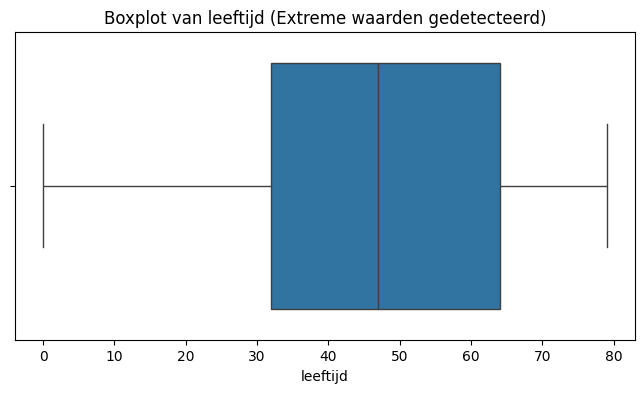

 - gewicht_KG: 1490 extreme waarden


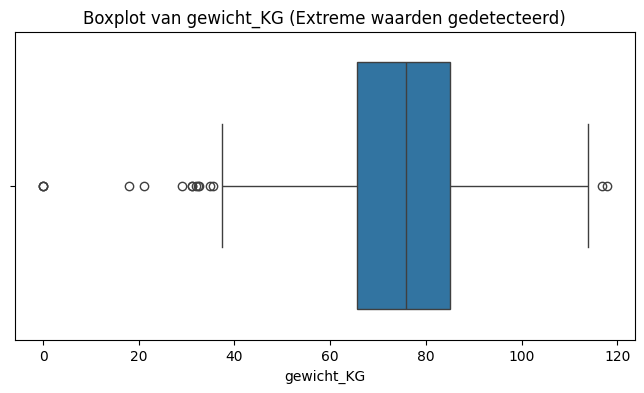

 - jaarsalaris_eu: 1492 extreme waarden


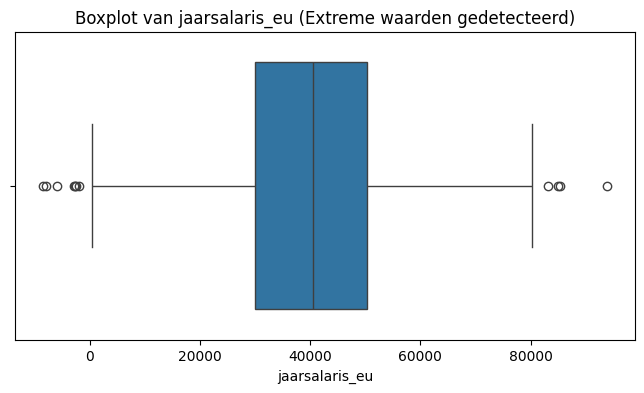

 - huishouden_grootte: 1500 extreme waarden


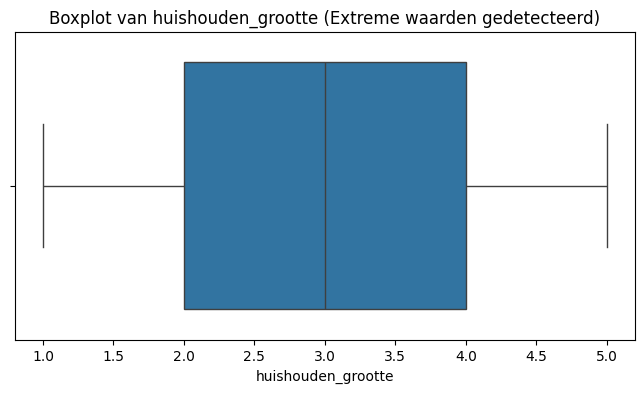

 - km_auto_per_jaar: 1500 extreme waarden


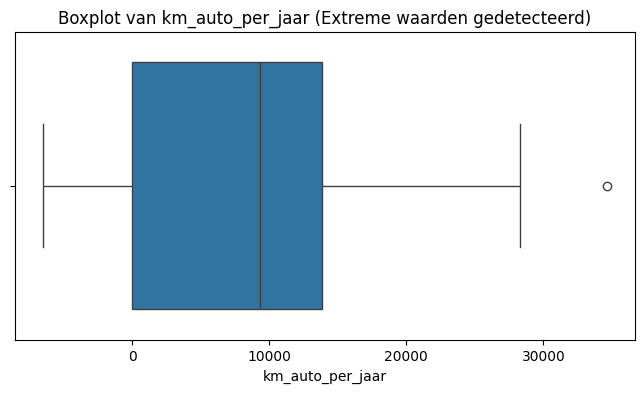

 - km_fiets_per_jaar: 1355 extreme waarden


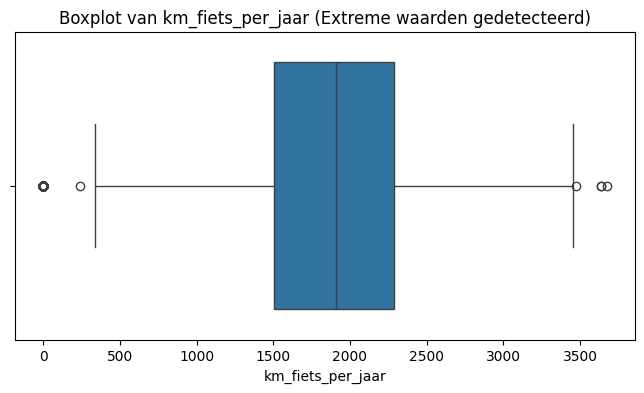

 - km_ov_per_jaar: 1494 extreme waarden


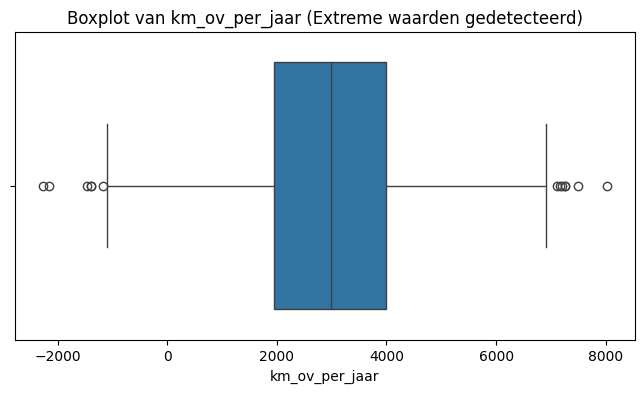

 - km_vliegtuig_per_jaar: 1500 extreme waarden


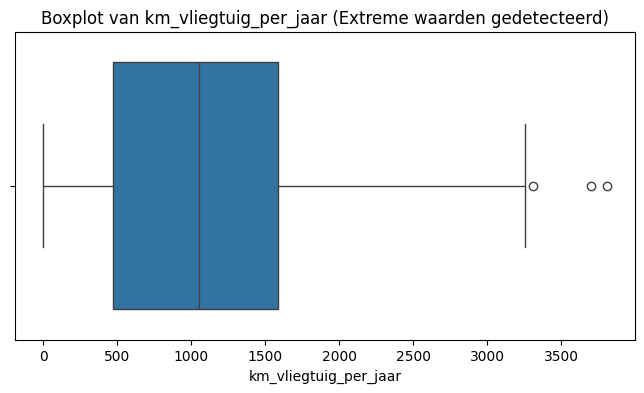

 - dagen_thuiswerken_per_week_pro_rato: 1500 extreme waarden


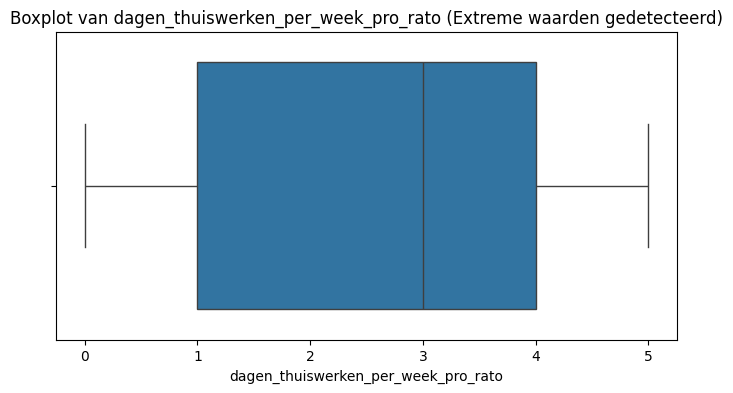

 - dagen_kantoorwerken_per_week_pro_rato: 1500 extreme waarden


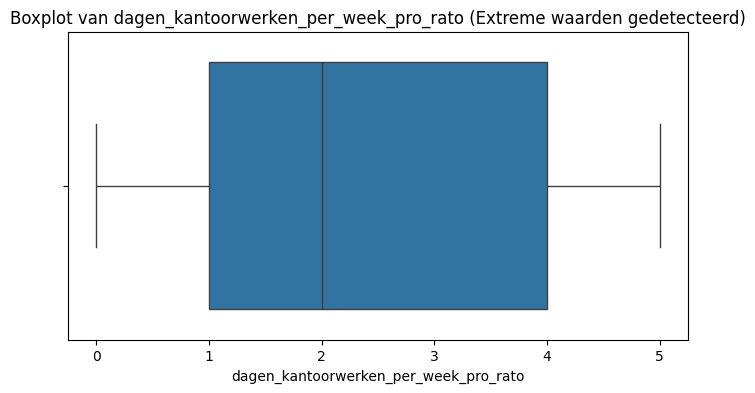

 - dagen_in_buitenland_per_jaar: 1500 extreme waarden


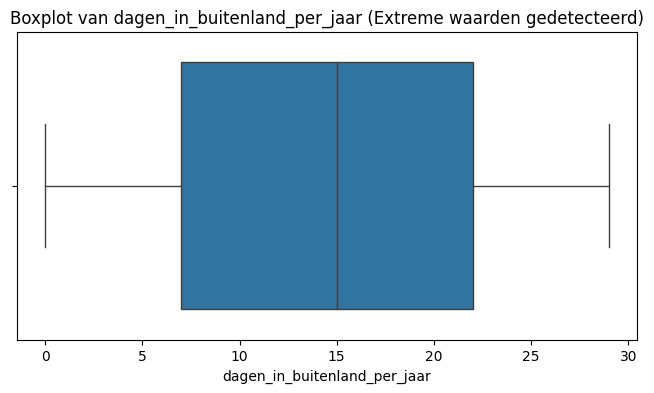

 - co2_uitstoot_per_jaar_KG: 1493 extreme waarden


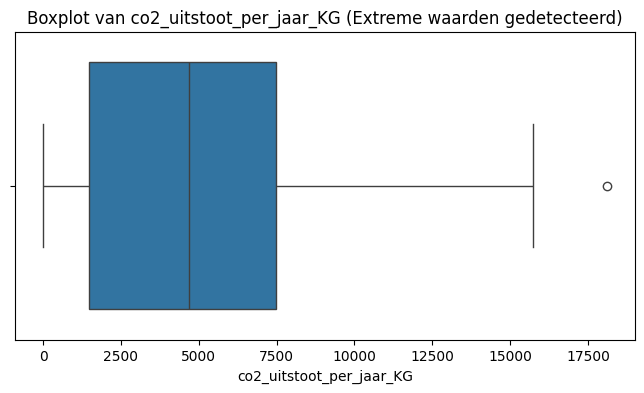

/tmp/ipykernel_371/3101121033.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missend.values, y=missend.index, palette="Blues_d")


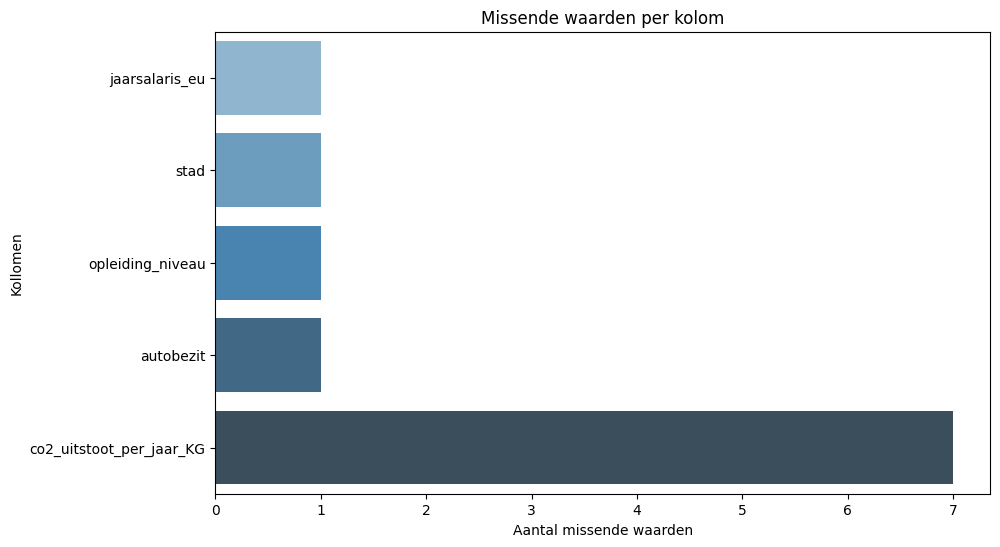

/tmp/ipykernel_371/3101121033.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negatief.values, y=negatief.index, palette="Reds_d")


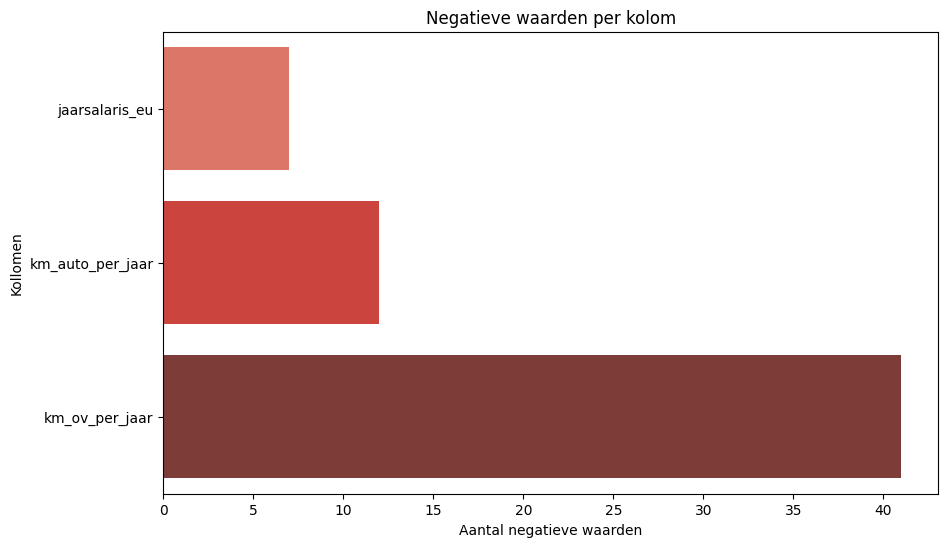

In [19]:
# 3

# Verwijder ID kolom
if 'persoon_ID' in df_co2.columns:
    df_co2 = df_co2.drop('persoon_ID', axis=1)

def data_kwaliteit_check(df):
    """
    Data kwaliteit rapport, toont missende waarden, negatieve waarde en extreme waarde
    """
    print(f"Data kwaliteit rapport van: {df}\n")

    # Totaal missende waarden:
    totaal_missend = df.isnull().sum().sum()
    print(f"Totaal aantal missende waarden: {totaal_missend}\n")

    # Missende waarden per kolom:
    missend_kolom = df.isnull().sum()
    print("Missende waarden per kolom:")
    print(missend_kolom[missend_kolom > 0])
    print()

    # Totaal aantal negatieve waarden:
    df_numeriek = df.select_dtypes(include=[np.number])
    totaal_negatief = (df_numeriek < 0).sum().sum()
    print(f"Totaal aantal negatiefe waarden in numerieke kollomen: {totaal_negatief}\n")

    # Negatieve waarden per kolom:
    negatief_per_kolom = (df_numeriek < 0).sum()
    print("Negatieve waarden per kolom:")
    print(negatief_per_kolom[negatief_per_kolom > 0])
    print()

    # Extreme waarden met hulp van IQR
    print("Extreme waarden gedetecteerd:")
    for col in df_numeriek.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        laag = Q1 - 2.5 * IQR
        hoog = Q3 - 2.5 * IQR

        extreem_aantal = ((df[col] < laag) | (df[col] > hoog)).sum()
        if extreem_aantal > 0:
            print(f" - {col}: {extreem_aantal} extreme waarden")
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col])
            plt.title(f"Boxplot van {col} (Extreme waarden gedetecteerd)")
            plt.show()
    print()

    # Missende waarden per kolom plot
    missend = missend_kolom[missend_kolom > 0]
    if not missend.empty:
        plt.figure(figsize=(10,6))
        sns.barplot(x=missend.values, y=missend.index, palette="Blues_d")
        plt.xlabel("Aantal missende waarden")
        plt.ylabel("Kollomen")
        plt.title("Missende waarden per kolom")
        plt.show()
    else:
        print("Geen missende waarden om te visualizeren")
    
    # Negatieve waarden per kolom plot
    negatief = negatief_per_kolom[negatief_per_kolom > 0]
    if not negatief.empty:
        plt.figure(figsize=(10,6))
        sns.barplot(x=negatief.values, y=negatief.index, palette="Reds_d")
        plt.xlabel("Aantal negatieve waarden")
        plt.ylabel("Kollomen")
        plt.title("Negatieve waarden per kolom")
        plt.show()
    else:
        print("Geen negatieve waarden om te visualizeren")

data_kwaliteit_check(df_co2)

We zien hier nu dat er 7 missende waarden zijn in de co2 kolom. Dat is nouw net de belangrijkste kolom voor ons. Verder missen er van 4 andere kollomen ook 1 waarden, ik ga er vanuit dat dit dezelfde rij is en verwijder deze.

We verwijderen deze en doen de check nogmaals

Data kwaliteit rapport van:      geslacht  leeftijd  gewicht_KG burgerlijke_staat  jaarsalaris_eu  ...  \
0         man        50       52.66  weduwe/weduwnaar        48003.64  ...   
1       vrouw        65       64.58       samenwonend        55208.63  ...   
2         man        49       90.87       samenwonend        29533.78  ...   
3         man        34       80.43            gehuwd        44453.27  ...   
4         man        60       72.28          ongehuwd        56497.64  ...   
...       ...       ...         ...               ...             ...  ...   
1495      man        78       85.84  weduwe/weduwnaar        28295.50  ...   
1496      man        54       85.09          ongehuwd        45963.45  ...   
1497      man        48       71.79  weduwe/weduwnaar        43443.92  ...   
1498      man        76       69.02            gehuwd        33158.29  ...   
1499      man        61       40.47  weduwe/weduwnaar        30786.00  ...   

      dagen_thuiswerken_per_week_pr

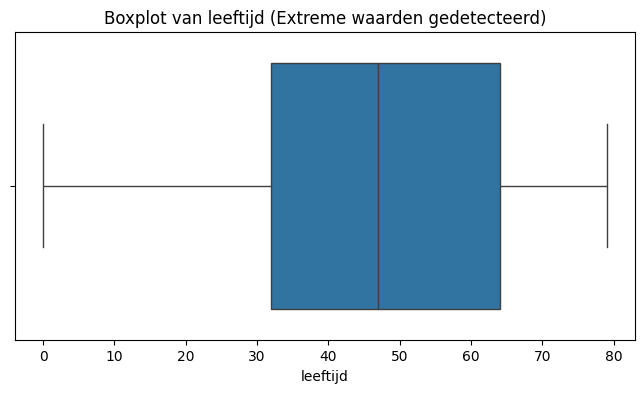

 - gewicht_KG: 1479 extreme waarden


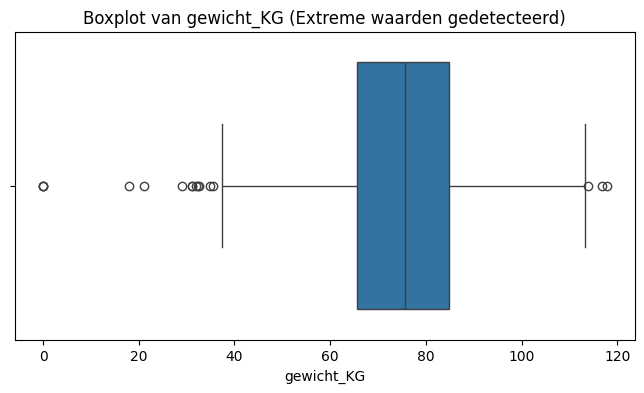

 - jaarsalaris_eu: 1489 extreme waarden


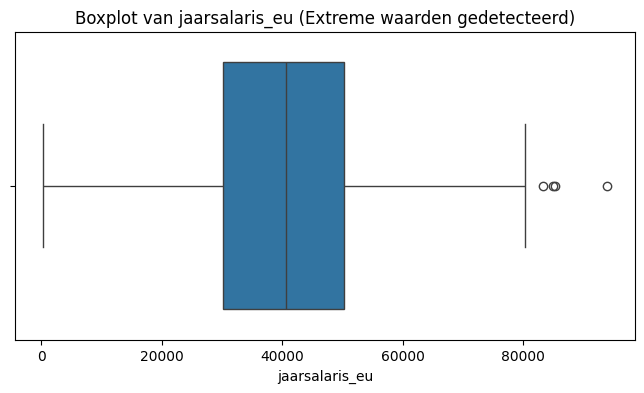

 - huishouden_grootte: 1489 extreme waarden


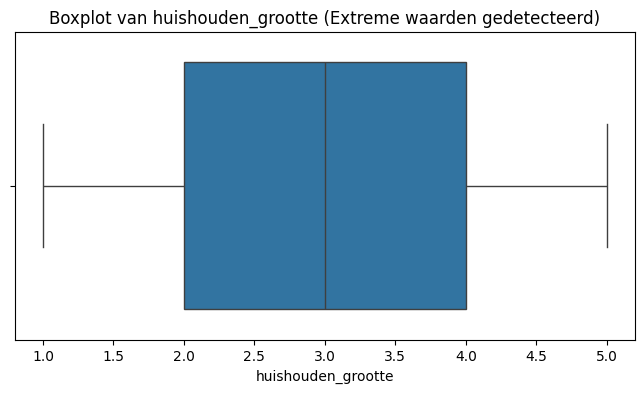

 - km_auto_per_jaar: 1489 extreme waarden


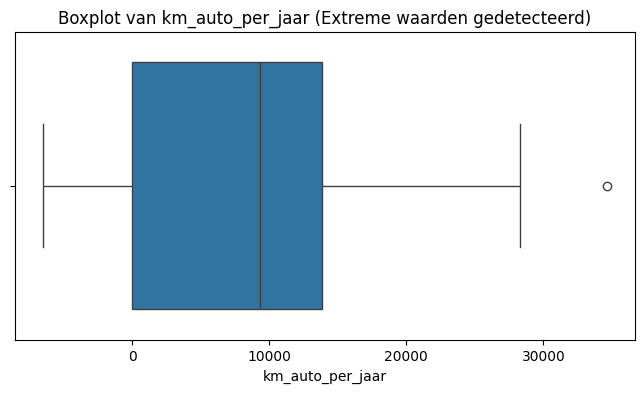

 - km_fiets_per_jaar: 1345 extreme waarden


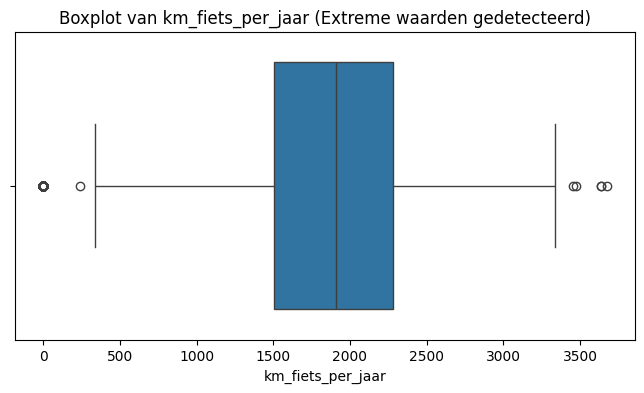

 - km_ov_per_jaar: 1482 extreme waarden


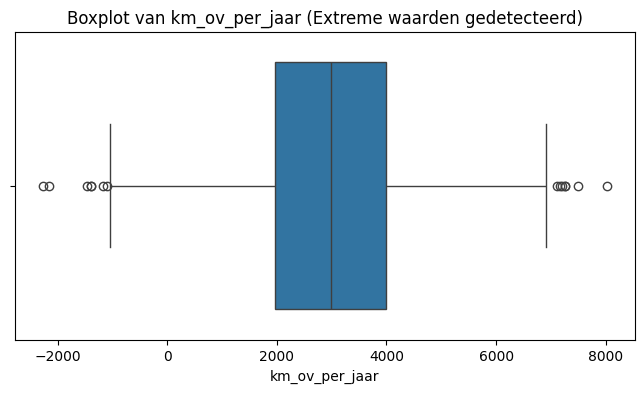

 - km_vliegtuig_per_jaar: 1489 extreme waarden


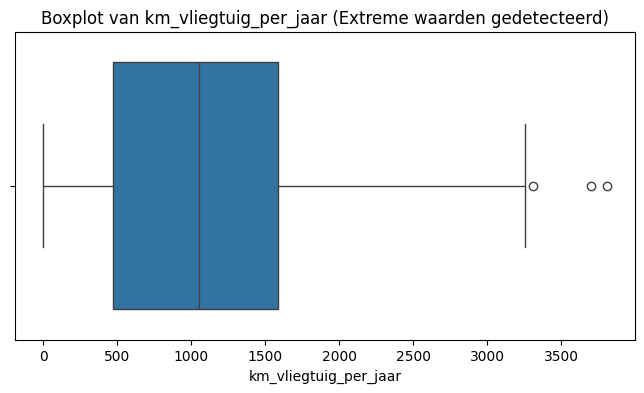

 - dagen_thuiswerken_per_week_pro_rato: 1489 extreme waarden


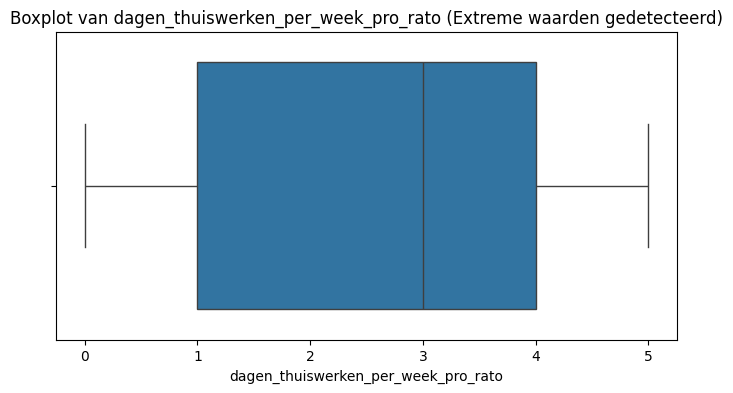

 - dagen_kantoorwerken_per_week_pro_rato: 1489 extreme waarden


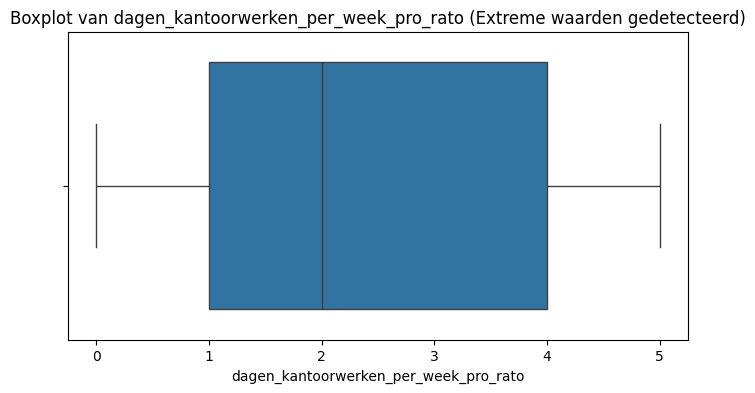

 - dagen_in_buitenland_per_jaar: 1489 extreme waarden


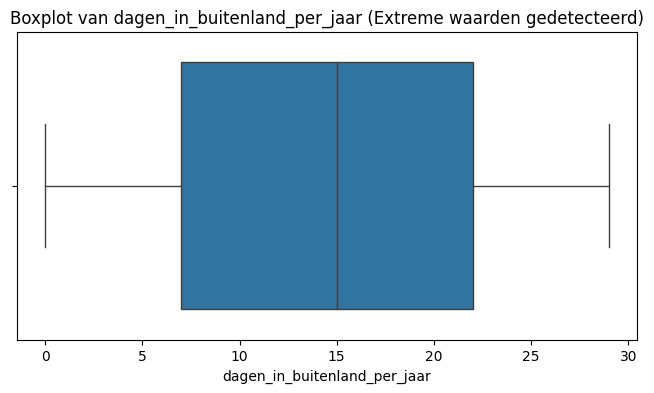

 - co2_uitstoot_per_jaar_KG: 1489 extreme waarden


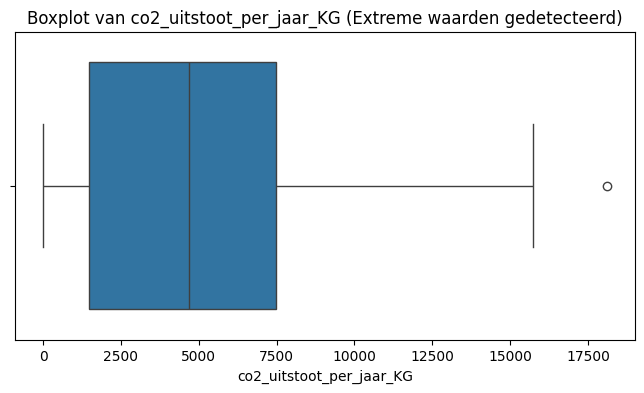


Geen missende waarden om te visualizeren


/tmp/ipykernel_371/3101121033.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negatief.values, y=negatief.index, palette="Reds_d")


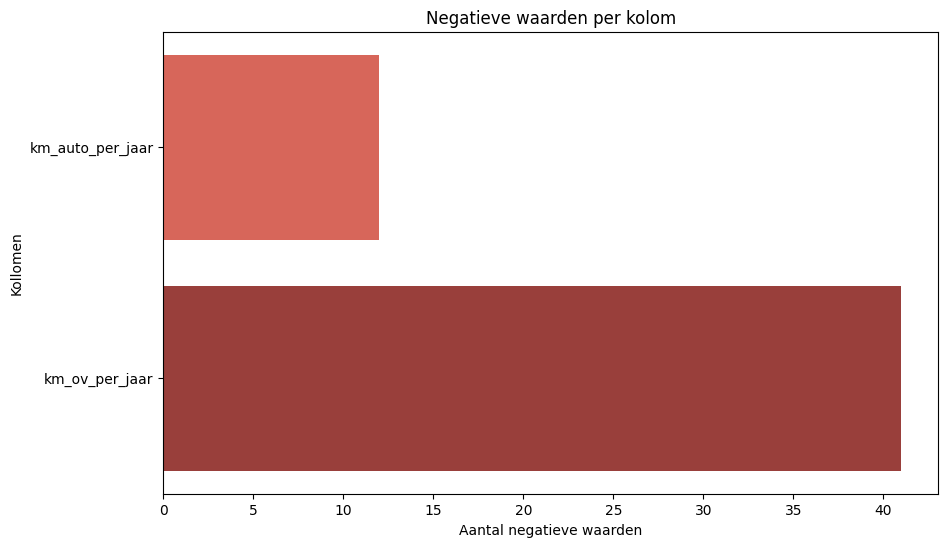

In [20]:
df_co2 = df_co2.dropna(subset=['co2_uitstoot_per_jaar_KG', 'autobezit', 'jaarsalaris_eu', 'stad', 'opleiding_niveau'])
data_kwaliteit_check(df_co2)

We gaan verder niks doen met de uitschieters (voorlopig) aangezien dit nog niks ernstigs doet. Wel gaan we ervoor zorgen dat er geen negatieve getallen staan waar dit niet kan.

Je kan bijvoorbeeld niet -200 km per jaar hebben gereden.

We veranderen alle negatieve waarden naar NaN zodat we later kunnen beslissen wat we er mee doen. Het zal zeker kunnen dat dit 0 hoort te zijn, of misschien hoort de - er hellemaal niet.

In [21]:
# Kollomen definieren
foute_kollomen = ['km_auto_per_jaar', 'km_ov_per_jaar']
for col in foute_kollomen:
    df_co2.loc[df_co2[col] < 0, col] = np.nan

4.	Kies 2 onafhankelijke variabelen waarvan je denkt dat het invloed kan hebben op de jaarlijkse CO2 uitstoot. Visualiseer de verdeling van deze twee variabelen en de verdeling van de afhankelijke variabele.

Ik ga hiervoor eerst kijken wat de correlaties zijn tussen de data met een heatmap

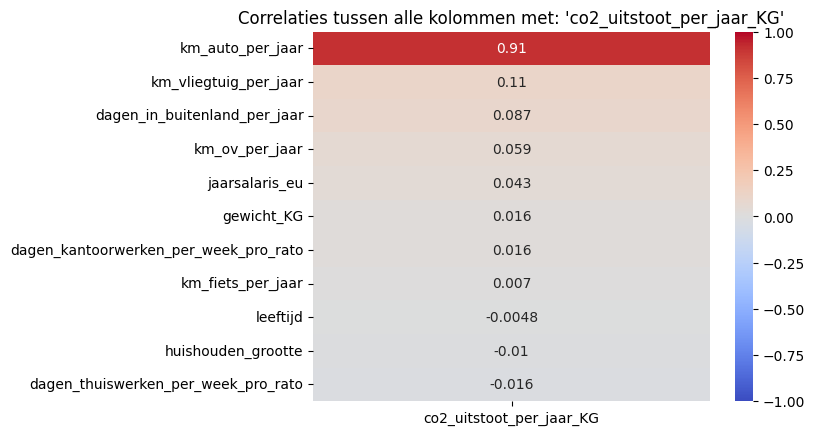

In [24]:
# 4
# Heatmap configuratie
df_co2_numeriek = df_co2.select_dtypes(include=[np.number])
co2_kolom = "co2_uitstoot_per_jaar_KG"
correlaties = df_co2_numeriek.corr()[[co2_kolom]].drop(co2_kolom)
correlaties = correlaties.sort_values(by=co2_kolom, ascending=False)

# Heatmap
sns.heatmap(correlaties, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title(f"Correlaties tussen alle kolommen met: '{co2_kolom}'")
plt.show()

We halen hieruit dat de 2 onafhankelijke variabelen die het meeste invloed hebben km_auto per jaar en km vliegtuig per jaar zijn.



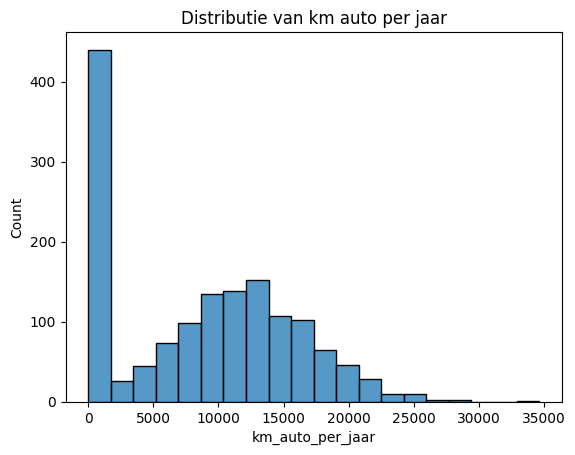

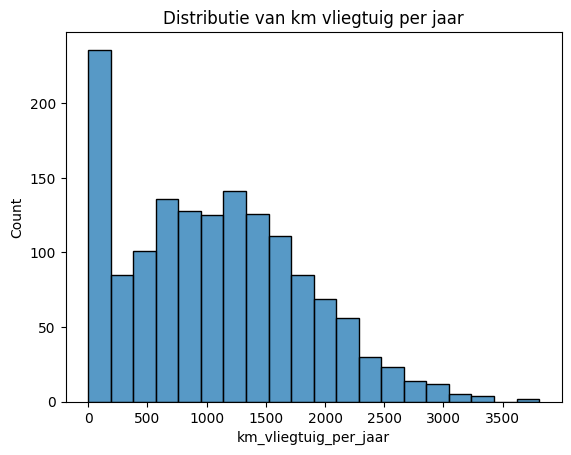

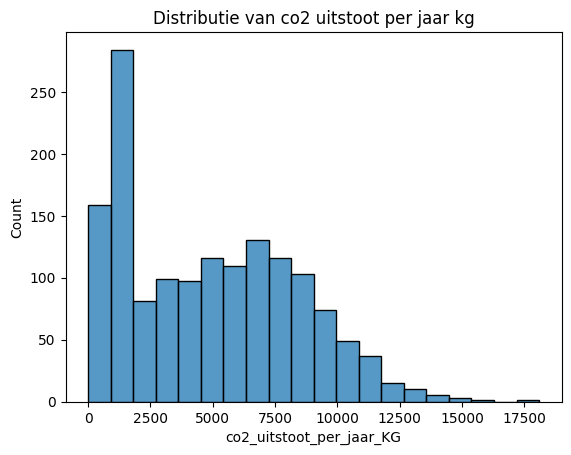

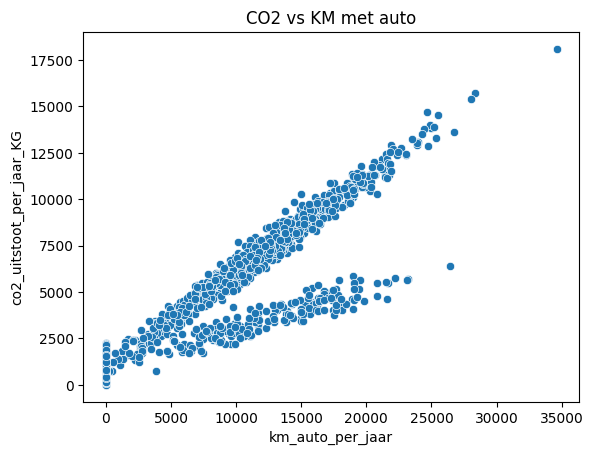

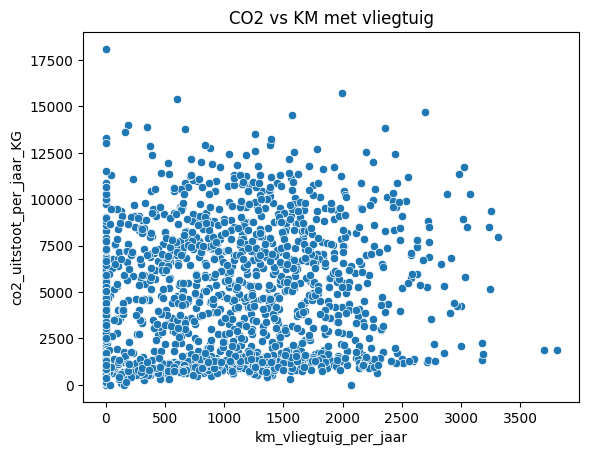

In [46]:
sns.histplot(df_co2_numeriek['km_auto_per_jaar'], kde=False, bins=20)
plt.title('Distributie van km auto per jaar')
plt.show()

sns.histplot(df_co2_numeriek['km_vliegtuig_per_jaar'], kde=False, bins=20)
plt.title('Distributie van km vliegtuig per jaar')
plt.show()

sns.histplot(df_co2_numeriek['co2_uitstoot_per_jaar_KG'], kde=False, bins=20)
plt.title('Distributie van co2 uitstoot per jaar kg')
plt.show()

sns.scatterplot(x='km_auto_per_jaar', y='co2_uitstoot_per_jaar_KG', data=df_co2_numeriek)
plt.title('CO2 vs KM met auto')
plt.show()

sns.scatterplot(x='km_vliegtuig_per_jaar', y='co2_uitstoot_per_jaar_KG', data=df_co2_numeriek)
plt.title('CO2 vs KM met vliegtuig')
plt.show()

Wat mij het meeste opvalt is dat het heel erg duidelijk is dat km met de auto heel veel invloed heeft op de CO2 uitstoot, terwijl km vliegtuig vrijwel niks heeft.

Zo zien we ook dat de meest uitstotende persoon 0 km heeft gevlogen maar ook de meeste km met de auto heeft (ongeveer 35000)

5.	Geef een beschrijving van de 3 visualisaties met behulp van statistische termen.

Bij alle visualizes er is grote hoeveelheid van data met ≈0 waarden, dit heeft een invloed bij de spread en verdeling van de data en betekent ook dat data is niet altijd qua statistieken "netjes" verdeeld. Het is ook de rede waarom ik heb gekozen om IQR in plaats van bereik te gebruiken.

#1 (km_auto_per_jaar): Zonder extreme waarden mean, mode en mediaan zijn in ongeveer hetzelfde plek. Er is geen Skewness.

#2 (km_vliegtuig_per_jaar): Er is grootste getallen op de linkerkant van de plot met kleinste getallen op de rechterkant. Dit geeft aan rechte/positive Skewness van 0.414 (kleine "tail" op rechte kant), met negatieve Kurtosis van -0.34, dus de "peak" is best wel "flat" in vergelijking met normaal verdeeld data.

#3 (co2_uitstoot_per_jaar_KG): Vergelijkbare rechte Skewness met plot #2 (0.440) maar dan met grootse negative Kurtosis, dus te "peak" is nog meer "flatter".



In [6]:
# 5
# function with column statistics
def show_statistics(var):
    print(var.describe())
    print(f"Median: {var.median()}")
    print(f"Skewness: {var.skew()}")
    print(f"Kurtosis: {var.kurt()}")
    print(f"IQR: {iqr(var)}")
    print(f"Null: {var.isnull().sum()}")
print("--- km_auto_per_jaar ---")
show_statistics(car_kpy)
print("--- km_vliegtuig_per_jaar ---")
show_statistics(plane_kpy)
print("--- co2_uitstoot_per_jaar_KG ---")
show_statistics(co2_py)

--- km_auto_per_jaar ---
count     1500.000000
mean      8597.262393
std       7021.428530
min      -6506.630000
25%          0.000000
50%       9356.380000
75%      13842.732500
max      34618.870000
Name: km_auto_per_jaar, dtype: float64
Median: 9356.380000000001
Skewness: 0.1678828783231597
Kurtosis: -0.960381076063419
IQR: 13842.7325
Null: 0
--- km_vliegtuig_per_jaar ---
count    1500.000000
mean     1072.277327
std       748.651072
min         0.000000
25%       471.540000
50%      1052.140000
75%      1588.555000
max      3808.200000
Name: km_vliegtuig_per_jaar, dtype: float64
Median: 1052.1399999999999
Skewness: 0.41399042702396605
Kurtosis: -0.3404479466219743
IQR: 1117.015
Null: 0
--- co2_uitstoot_per_jaar_KG ---
count     1493.000000
mean      4912.341875
std       3422.902397
min          0.000000
25%       1469.450000
50%       4677.280000
75%       7481.550000
max      18098.440000
Name: co2_uitstoot_per_jaar_KG, dtype: float64
Median: 4677.28
Skewness: 0.44059068170121335

6.	Toets, met behulp van statistiek, of de verdelingen (vraag 4) normaal verdeeld zijn.

Ik heb een functie gemaakt die gebruikt shapiro om te berekenen of de verdelingen normaal verdeeld zijn. Dit is niet 100% accuraat maar met berekeningen uit vorige opdracht met statistieken krijg ik een goede beeld van de verdeling. Ik heb hierbij threshold van 0.05 p gezet, omdat dit de norm is in bepalen of de verschil klein genoeg is. Als die p groter is dan de threshold, dan de data is normaal verdeeld.

In [7]:
# 6
def normaal_verdeeld(var):
    stat, p = shapiro(var)
    print(f"Normaal Verdeeld: {p > 0.05} ({p})")

print("--- km_auto_per_jaar ---")
normaal_verdeeld(car_kpy)
print("--- km_vliegtuig_per_jaar ---")
normaal_verdeeld(plane_kpy)
print("--- co2_uitstoot_per_jaar_KG ---")
normaal_verdeeld(co2_py) # p van 1 kan niet hier kloppen...

--- km_auto_per_jaar ---
Normaal Verdeeld: False (8.351651722054391e-28)
--- km_vliegtuig_per_jaar ---
Normaal Verdeeld: False (1.8340720034474885e-18)
--- co2_uitstoot_per_jaar_KG ---
Normaal Verdeeld: True (1.0)


7.	Om ervoor te zorgen dat de onafhankelijke variabelen gebruikt kunnen worden voor Machine Learning moeten ze getransformeerd worden. Geef per meetniveau aan wat er moet gebeuren en waarom.

In ider geval de data moet in de vorm van dataframe of numpy array zijn zonder null waarden en numerieke waarden.

Nominaal: Categorische data zonder volgorde moet worden omgezet naar dummyvariabelen, zodat het model de categorieën kan gebruiken zonder te denken dat er een volgorde is.

Ordinaal: Data moet naar numerieke waarden geconverteerd worden (mapping), zodat ze in een model kunnen worden ingevuld en voorspeld worden.

Interval: Standarizatie (Z-scoren) uitvoeren om data op schaal te krijgen, zodat de data gelijk verdeeld is op de schaal bij verschillende variabelen.
Ratio: Hetzelfde als bij Interval.


8.	Voer de transformatie uit. Let op dat je de getransformeerde variabelen in een nieuw dataframe opslaat, zodat je de oorspronkelijke waarden behoudt. De getransformeerde variabelen gebruik je alleen bij deel D. Zorg dat je inzicht krijgt in de relatie tussen de variabelen. Wat zijn je bevindingen?

Ik heb copies gemaakt van dataframes om de organelle niet te veranderen. Daarna heb ik aanpassingen gemaakt op basis van opdracht 1 voor de kolommen. 

In [38]:
# 8
# Dumming Nominaals:
nominaal_co2_dum = df_co2.copy()
nominaal_co2_dum = pd.get_dummies(df_co2, columns=['geslacht', 'burgerlijke_staat', 'stad', 'provincie', 'autobezit', 'fietsbezit', 'elektrisch_auto'], drop_first=True)

# Mapping Ordinaals:
print(df_co2['opleiding_niveau'].unique())
print(df_co2['gebruik_carsharing'].unique())
ordinaal_co2_num = df_co2.copy()
ordinaal_co2_num['opleiding_niveau'] = ordinaal_co2_num['opleiding_niveau'].map(
    {'MBO': 1, 'HBO': 2, 'WO': 3})
ordinaal_co2_num['gebruik_carsharing'] = ordinaal_co2_num['gebruik_carsharing'].map(
    {'Nooit': 1, 'Heel soms': 2, 'Soms': 3, 'Vaak': 4, 'Altijd': 5})

# Standardizing Ratios:
ratio_co2 = ['leeftijd', 'gewicht_KG', 'jaarsalaris_eu', 'huishouden_grootte',
                 'km_auto_per_jaar', 'km_fiets_per_jaar', 'km_ov_per_jaar',
                 'km_vliegtuig_per_jaar', 'dagen_thuiswerken_per_week_pro_rato',
                 'dagen_kantoorwerken_per_week_pro_rato', 'dagen_in_buitenland_per_jaar','co2_uitstoot_per_jaar_KG']
scaler = StandardScaler()
co2_ratio_scaled = ordinaal_co2_num.copy()
co2_ratio_scaled[ratio_co2] = scaler.fit_transform(ordinaal_co2_num[ratio_co2])

['MBO' 'WO' 'HBO' nan]
['Nooit' 'Heel soms' 'Altijd' 'Vaak' 'Soms']


9.	Welke methode(n) heb je gebruikt en waarom?

In [10]:
# 9

10.	Is er sprake van multicollineariteit? Waarom zou dit een probleem kunnen zijn en wat zou jouw oplossing zijn?

In [11]:
# 10

11.	Bekijk de relatie tussen uitstoot CO2 en de andere onafhankelijke variabelen per geslacht. Kom je hier tot een andere conclusie dan bij vraag 8?

In [12]:
# 11

# Deel B: Kansrekenen

12.	Wat is de kans dat een willekeurig persoon 5000 KG CO2 uitstoot? Gebruik de standaard normaal verdeling in de berekening.

In [13]:
# 12

13.	Op welke manier wordt, bij deze berekening, een van de technieken van calculus toegepast?

In [14]:
# 13

14.	Is deze kans groter, gelijk of kleiner bij mannen t.o.v. vrouwen?

In [15]:
# 14

# Deel C: Toetsende statistiek

15.	Stel de hypothesen op.

In [16]:
# 15

16.	Welke type fouten kunnen er gemaakt worden?

In [17]:
# 16

17.	Welke statistische toets moet je uitvoeren om te onderzoeken of er een significant verschil is?

In [18]:
# 17

18.	Voer de toets uit.

In [19]:
# 18

19.	Geef in je eigen woorden een toelichting op de betekenis van de p-waarde.

In [20]:
# 19

20.	Welke conclusie kan je trekken?

In [21]:
# 20

# Deel D: Modelleren

21.	Train een model om de jaarlijkse CO2 uitstoot te voorspellen. Op hoeveel verschillende mogelijkheden kan deze split gemaakt worden?

In [22]:
# 21

22.	Train een model om de jaarlijkse CO2 uitstoot te voorspellen. Welke metric zou je gebruiken om te toetsen hoe goed je model is en waarom?


In [23]:
# 22

23.	Geef de wiskunde functie van het model en pas deze toe op jouw eigen situatie (kies 1 groepsgenoot).

In [24]:
# 23

24.	Gebruik toetsende statistiek en de resultaten van de 20-fold cross validation om te onderzoeken welk model significant beter is.

In [25]:
# 24

25.	Splits de target variabele op in 2 klassen, kies hiervoor een geschikte punt. Codeer de eerste groep als 0 en de tweede groep als 1. Welk model zou je nu kunnen gebruiken en waarom?


In [26]:
# 25

26.	Train een nieuw model op de nieuwe target, gebruik hierbij alleen de vijf meest invloedrijke onafhankelijke variabelen die je eerder hebt gekozen. Geef de wiskunde functie van dit model en pas deze toe op jouw eigen situatie (kies 1 groepsgenoot).


In [27]:
# 26

27.	Schrijf een conclusie op basis van de twee hoofdvragen van het portfolio (zie kopje ‘Vraagstellingen’)


In [28]:
# 27

###